In [9]:
import pandas as pd

columnsMap = {
    "instantiationCount": "Instantiation Count",
    "symbolCount": "Symbol Count",
    "checkTime": "Check Time"
}

df = pd.read_json("../root.bench.ts.json").transpose().rename(columns=lambda x: columnsMap[x] if x in columnsMap else x)
df

,Instantiation Count,Symbol Count,Check Time
"Root<""1"", ""2"">","{'mean': 101781, 'variance': 0}","{'mean': 109272, 'variance': 0}","{'mean': 657.9258251190186, 'variance': 4637.2..."
"Root<""10"", ""2"">","{'mean': 943579, 'variance': 0}","{'mean': 1452544, 'variance': 0}","{'mean': 2231.2624120354653, 'variance': 26354..."
"Root<""100"", ""2"">","{'mean': 995709, 'variance': 0}","{'mean': 1572244, 'variance': 0}","{'mean': 2358.442779350281, 'variance': 46642...."
"Root<""1000"", ""2"">","{'mean': 1150338, 'variance': 0}","{'mean': 1817911, 'variance': 0}","{'mean': 2457.2317808747293, 'variance': 7974...."
"Root<""10000"", ""2"">","{'mean': 1290084, 'variance': 0}","{'mean': 2050537, 'variance': 0}","{'mean': 2717.1362761616706, 'variance': 22569..."
"Root<""100000"", ""2"">","{'mean': 1390432, 'variance': 0}","{'mean': 2182647, 'variance': 0}","{'mean': 3114.909871840477, 'variance': 89929...."
"Root<""1000000"", ""2"">","{'mean': 1480678, 'variance': 0}","{'mean': 2265128, 'variance': 0}","{'mean': 3476.877837765217, 'variance': 132963..."
"Root<""10000000"", ""2"">","{'mean': 1715701, 'variance': 0}","{'mean': 2646496, 'variance': 0}","{'mean': 3535.670184135437, 'variance': 217462..."
"Root<""100000000"", ""2"">","{'mean': 1944285, 'variance': 0}","{'mean': 2999358, 'variance': 0}","{'mean': 4017.5913332104683, 'variance': 22143..."
"Root<""1000000000"", ""2"">","{'mean': 2264897, 'variance': 0}","{'mean': 3526995, 'variance': 0}","{'mean': 4512.276342785359, 'variance': 45757...."


In [10]:
latex = df.applymap(
    lambda x: "{:0.4f} \pm {:0.4f}".format(x["mean"], x["variance"])
    if x["variance"] > 0
    else str(x["mean"])
).drop("Symbol Count", axis=1)

latex.index = latex.index.map(lambda x: f"\code{{{x}}}")
print(
    latex.to_latex(escape=False, formatters={
        "Check Time": lambda x: f"${x}$",
    }, float_format="%.2f")
)

\begin{tabular}{lll}
\toprule
{} & Instantiation Count &                   Check Time \\
\midrule
\code{Root<"1", "2">}                   &              101781 &     $657.9258 \pm 4637.2670$ \\
\code{Root<"10", "2">}                  &              943579 &   $2231.2624 \pm 26354.7449$ \\
\code{Root<"100", "2">}                 &              995709 &   $2358.4428 \pm 46642.8882$ \\
\code{Root<"1000", "2">}                &             1150338 &    $2457.2318 \pm 7974.3022$ \\
\code{Root<"10000", "2">}               &             1290084 &   $2717.1363 \pm 22569.9561$ \\
\code{Root<"100000", "2">}              &             1390432 &   $3114.9099 \pm 89929.3402$ \\
\code{Root<"1000000", "2">}             &             1480678 &  $3476.8778 \pm 132963.1171$ \\
\code{Root<"10000000", "2">}            &             1715701 &  $3535.6702 \pm 217462.3269$ \\
\code{Root<"100000000", "2">}           &             1944285 &   $4017.5913 \pm 22143.6082$ \\
\code{Root<"1000000000", "2">}        

/var/folders/l5/qn98b8m12cd_0zlmxh0p_pvm0000gn/T/ipykernel_79837/1545966327.py:9: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex.to_latex(escape=False, formatters={


<Axes: >

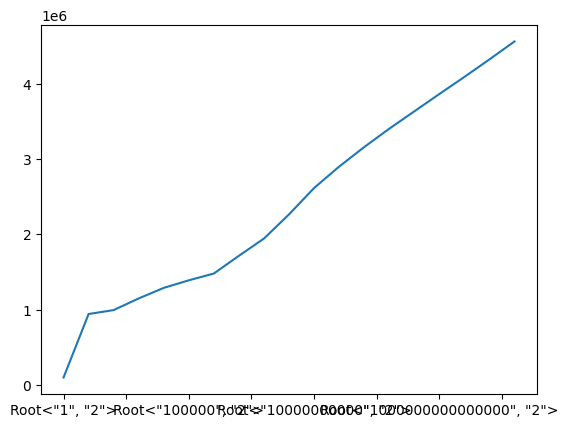

In [11]:
df.applymap(lambda x: x["mean"])["Instantiation Count"].plot()